<a href="https://colab.research.google.com/github/Rachel602144/pokemon/blob/main/pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("Pokemon.csv")

In [ ]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


data cleaning

In [ ]:
df.drop(columns=["#","Generation","Legendary"],inplace=True)

creating mega evolution column

In [ ]:
df["Mega_evolution"]=df["Name"].apply(lambda x:"Yes" if "Mega" in x else "No")

In [ ]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Mega_evolution
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,No
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,No
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,No
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Yes
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,No


In [ ]:
df.drop(columns=["Name"],inplace=True)

In [ ]:
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Mega_evolution
0,Grass,Poison,318,45,49,49,65,65,45,No
1,Grass,Poison,405,60,62,63,80,80,60,No
2,Grass,Poison,525,80,82,83,100,100,80,No
3,Grass,Poison,625,80,100,123,122,120,80,Yes
4,Fire,NaN,309,39,52,43,60,50,65,No


splitting data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

define features

In [ ]:
x=df.drop(columns=["Mega_evolution"])

define target

In [ ]:
y=df["Mega_evolution"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
y_train = y_train.map({"No": 0, "Yes": 1})
y_test = y_test.map({"No": 0, "Yes": 1})

print number of rows in training set and testing set

In [ ]:
print("Training set size:",x_train.shape[0])
print("Testing set size:",x_test.shape[0])


Training set size: 640
Testing set size: 160


training the data

In [ ]:
from sklearn.linear_model import LogisticRegression

initialize model

In [ ]:
lr=LogisticRegression()

one hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
categorical_features = ["Type 1", "Type 2"]
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
x_train_encoded = encoder.fit_transform(x_train[categorical_features])
x_test_encoded = encoder.transform(x_test[categorical_features])
encoded_columns = encoder.get_feature_names_out(categorical_features)
x_train_encoded = pd.DataFrame(x_train_encoded, columns=encoded_columns, index=x_train.index)
x_test_encoded = pd.DataFrame(x_test_encoded, columns=encoded_columns, index=x_test.index)
x_train = x_train.drop(columns=categorical_features)
x_test = x_test.drop(columns=categorical_features)
x_train = x_train.join(x_train_encoded)
x_test = x_test.join(x_test_encoded)



In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

predict target values

In [ ]:
y_predict=lr.predict(x_test)

confusion matrix

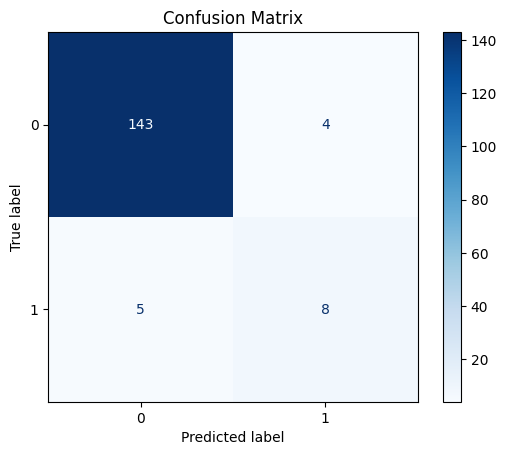

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
import matplotlib.pyplot as plt
plt.title("Confusion Matrix")
plt.show()


PR curve

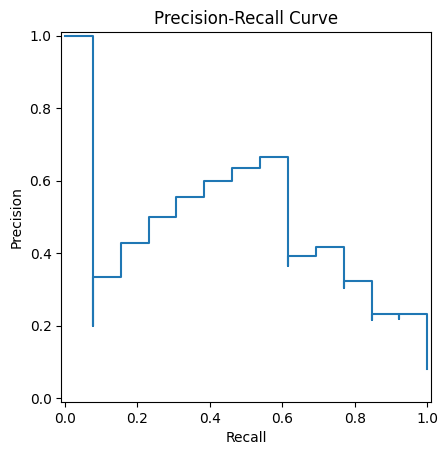

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
y_scores = lr.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot()
plt.title("Precision-Recall Curve")
plt.show()


ROC curve

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


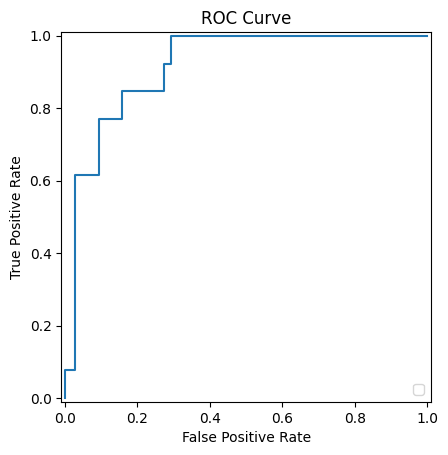

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.title("ROC Curve")
plt.show()
